***Please answer the questions below based on the data provided:***

Plot daily sales for all 50 weeks.
It looks like there has been a sudden change in daily sales. What date did it occur?
Is the change in daily sales at the date you selected statistically significant? If so, what is the p-value?
Does the data suggest that the change in daily sales is due to a shift in the proportion of male-vs-female customers? Please use plots to support your answer (a rigorous statistical analysis is not necessary).
Assume a given day is divided into four dayparts:
night (12:00AM - 6:00AM),
morning (6:00AM - 12:00PM),
afternoon (12:00PM - 6:00PM),
evening (6:00PM - 12:00AM).
What is the percentage of sales in each daypart over all 50 weeks?

***Data Description***
The datasets/ directory contains fifty CSV files (one per week) of timestamped sales data. Each row in a file has two columns:

sale_time - The timestamp on which the sale was made e.g. 2012-10-01 01:42:22
purchaser_gender - The gender of the person who purchased (male or female)

**Daily Sales Plot**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import glob

In Python, the glob module provides a convenient way to search for files that match a specified pattern. It's particularly useful for tasks such as iterating over a list of files in a directory or retrieving files with specific extensions.
example :
import glob

# Search for all .txt files in the current directory
txt_files = glob.glob('*.txt')

# Print the list of matching file paths
print(txt_files)


In [5]:
FIG_SIZE = (8,6)
l = [pd.read_csv(file) for file in glob.glob('*.csv')]
print(len(l)) #checks length of l
df = pd.concat(l,axis=0)
#axis=0 indicates that the concatenation will be done along the row axis, meaning that the DataFrames in the list l
#will be stacked on top of each other.
df.head()

50


,sale_time,purchaser_gender
0,2012-10-01 01:42:22,female
1,2012-10-01 02:24:53,female
2,2012-10-01 02:25:40,female
3,2012-10-01 02:30:42,female
4,2012-10-01 02:51:32,male


In [7]:
sale_day = pd.to_datetime(df['sale_time'])


Now, we can get the day by flooring the timestamp to the closest day. After that, we will group the sales entries by days with the groupby( ) function. Then we will count the entries in each group (which are the sale days in our case) with size( ), which gives us the sales amount for each day. Groupby objects use the given column as an index. As the last step, we will reformat the dataset with the _resetindex( ) function to get rid of sales day indexes.



In [14]:
daily_sales_df = sale_day.groupby(sale_day.dt.floor('d')).size().reset_index(name='sales_amount')
daily_sales_df.rename(columns={'sale_time':'sale_day'},inplace=True)
daily_sales_df.head()

,sale_day,sales_amount
0,2012-10-01,514
1,2012-10-02,482
2,2012-10-03,499
3,2012-10-04,546
4,2012-10-05,476


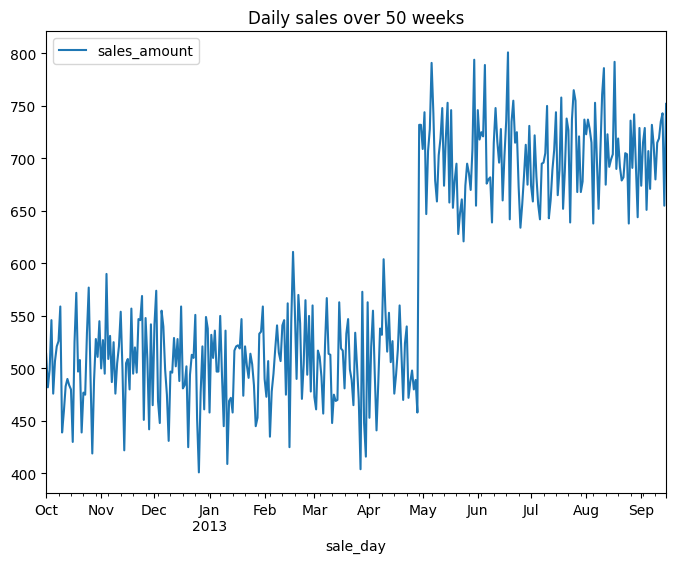

In [15]:
#  to use index in plotting make sale_day index
daily_sales_df.index = daily_sales_df['sale_day']
daily_sales_df.drop(columns=['sale_day'], inplace=True)

#  plot daily sales for all 50 weeks
daily_sales_df.plot(figsize=FIG_SIZE, title = "Daily sales over 50 weeks")
plt.show()

Using the date as the index in a DataFrame can be beneficial for plotting and analysis. Here's why it's useful in this context:

1. **Convenient Access**: Setting the date as the index allows for easy and direct access to data for specific dates. This can simplify data retrieval and manipulation, especially when working with time series data.

2. **Improved Readability**: When plotting time series data, having the date as the index can improve the readability of the plot. It ensures that the x-axis of the plot corresponds directly to the dates, making it easier to interpret the trends over time.

3. **Alignment with Time Series Operations**: Many pandas and matplotlib functions for time series analysis and plotting expect the index of the DataFrame to be a DateTimeIndex. By setting the date as the index, you ensure compatibility with these functions and avoid potential errors or inconsistencies.


***It looks like there has been a sudden change in daily sales. What date did it occur?***

In [19]:
# compare sales amount difference with the previous day and find the biggest difference 
# which should give the sudden change in the plot
daily_sales_df['prev_day_sale_amount'] = [None] + daily_sales_df['sales_amount'].to_list()[:-1]
daily_sales_df['difference_btw_prev_day'] = daily_sales_df['sales_amount'] - daily_sales_df['prev_day_sale_amount']
daily_sales_df.head()


,sales_amount,prev_day_sale_amount,difference_btw_prev_day
sale_day,,,
2012-10-01,514,NaN,NaN
2012-10-02,482,514.0,-32.0
2012-10-03,499,482.0,17.0
2012-10-04,546,499.0,47.0
2012-10-05,476,546.0,-70.0


In [25]:
# get the index of max change to answer what date did it occur
print(daily_sales_df['difference_btw_prev_day'].idxmax(axis=0))
daily_sales_df[daily_sales_df.index == '2013-04-29']

2013-04-29 00:00:00


,sales_amount,prev_day_sale_amount,difference_btw_prev_day
sale_day,,,
2013-04-29,732,458.0,274.0


***pvalue***




In [27]:
# scipy.stats include a function to do t-test and obtain p-value
from scipy import stats

# first drop all nan values (if any) for the test 
daily_sales_df.dropna(inplace=True)

# then compare the max change with all sales_amount column 
# to understand its statistical importance
stats.ttest_1samp(daily_sales_df['sales_amount'], 732)


TtestResult(statistic=-26.273266340051002, pvalue=1.3019593251472396e-84, df=348)

A t-test is a statistical hypothesis test used to determine if there is a significant difference between the means of two groups. It's commonly used when you have a small sample size or when the population standard deviation is unknown.

There are different types of t-tests depending on the research question and the characteristics of the data. The two most common types are:

One-sample t-test: This test compares the mean of a single sample to a known value (often a population mean). It helps determine if the sample mean is significantly different from the known value.
Independent two-sample t-test: This test compares the means of two independent groups to determine if there is a significant difference between them.
The t-test calculates a t-statistic, which is a measure of how different the sample means are relative to the variation in the data. The larger the t-statistic, the more evidence there is for a significant difference between the groups.

The p-value is the probability of observing a t-statistic as extreme as, or more extreme than, the one calculated from the data, under the assumption that the null hypothesis is true. In hypothesis testing, the null hypothesis typically states that there is no difference between the groups.

If the p-value is below a predetermined significance level (often denoted by α, commonly set at 0.05), then we reject the null hypothesis and conclude that there is a significant difference between the groups. Conversely, if the p-value is above the significance level, we fail to reject the null hypothesis, indicating that there is insufficient evidence to conclude that there is a significant difference between the groups.

The obtained p-value as the result of the t-test is 1.3019593251472396e-84 which is lower than 0.05 (we can assume the threshold as 0.05 as common practice). It leads to decide this particular date is important for us.



***Does the data suggest that the change in daily sales is due to a shift in the proportion of male-vs-female customers? Please use plots to support your answer (a rigorous statistical analysis is not necessary).***

In [30]:
# create gender_portions_df to analyze sales distribution over genders
df['sale_day'] = pd.to_datetime(df['sale_time']).dt.floor('d')
gender_portions_df = df.groupby(['sale_day', 'purchaser_gender']).size().reset_index(name='sales_amount')
gender_portions_df.head()

,sale_day,purchaser_gender,sales_amount
0,2012-10-01,female,413
1,2012-10-01,male,101
2,2012-10-02,female,379
3,2012-10-02,male,103
4,2012-10-03,female,386


In [31]:
# calculate female and male sales amount separately
new_df = pd.DataFrame(gender_portions_df['sale_day'].unique(),columns=['sale_day'])
new_df['female_sales_amount'] = pd.Series(gender_portions_df[gender_portions_df.purchaser_gender == 'female']['sales_amount']).reset_index(drop=True)
new_df['male_sales_amount'] = pd.Series(gender_portions_df[gender_portions_df.purchaser_gender == 'male']['sales_amount']).reset_index(drop=True)
new_df[-5:]

,sale_day,female_sales_amount,male_sales_amount
345,2013-09-11,224,495
346,2013-09-12,225,510
347,2013-09-13,206,537
348,2013-09-14,193,462
349,2013-09-15,230,522


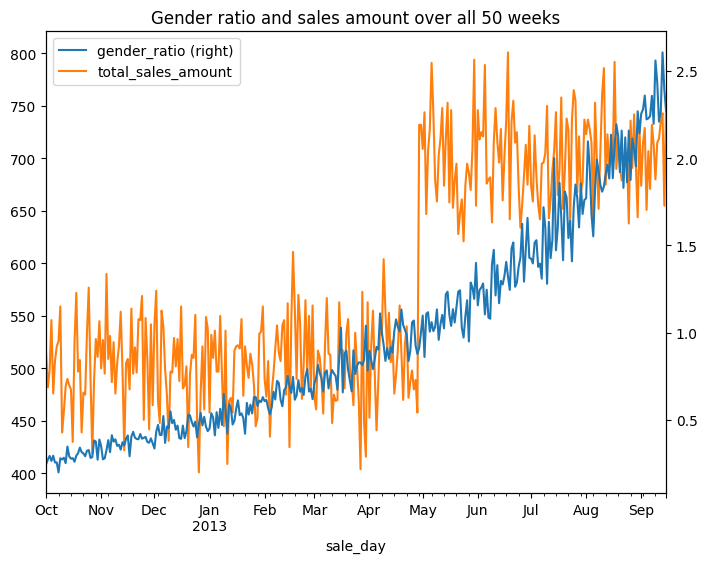

In [32]:
# calculate gender ratio of sales
new_df['gender_ratio'] = new_df['male_sales_amount']/new_df['female_sales_amount']

# plot gender ratio change over 50 weeks with the total sales amount
# observe if there is a correlation between them
plot_df = new_df.copy()
plot_df['total_sales_amount']  = plot_df['male_sales_amount'] + plot_df['female_sales_amount']
plot_df.drop(columns=['female_sales_amount', 'male_sales_amount'], inplace=True)
plot_df.index = plot_df['sale_day']
plot_df.drop(columns=['sale_day'], inplace=True)
plot_df.plot(secondary_y = ['gender_ratio'],figsize=FIG_SIZE, title= "Gender ratio and sales amount over all 50 weeks")
plt.show()

The increasing trend of the male ratio in the sales amount does not explain the sudden change. The reason should be something different. For example, it might be caused by starting a new marketing campaign or adding a new feature to the website.



***Assume a given day is divided into four dayparts: night (12:00AM - 6:00AM), morning (6:00AM to 12:00PM), afternoon (12:00PM to 6:00PM) and evening (6:00PM - 12:00AM). What is the percentage of sales in each daypart over all 50 weeks***

In [34]:
# extract sale hour to divide sales to the part of days
df['sale_hour']  = pd.to_datetime(df['sale_time']).dt.ceil('h').dt.hour
df.dtypes

sale_time                   object
purchaser_gender            object
sale_day            datetime64[ns]
sale_hour                    int64
dtype: object

In [36]:
# define a function to apply sale hour column to decide a part of day based on the mentioned logic
def assign_day_part(sale_hour):
    """Assign labels based on sale hour."""
    if sale_hour >= 6 and sale_hour < 12:
        return 'morning'
    if sale_hour >= 12 and sale_hour < 18:
        return 'afternoon'
    if sale_hour >= 18 and sale_hour < 24:
        return 'evening'
    if sale_hour >= 0 and sale_hour < 6:
        return 'night'

In [37]:
# apply the defined function and create day_part column
df['day_part'] = df['sale_hour'].apply(assign_day_part)

# drop unnecessary columns
df.drop(columns = ['purchaser_gender', 'sale_hour', 'sale_time'], inplace= True)

In [38]:
# calculate sales amount per day part
df_pct_sales = df.groupby(df.day_part).size().reset_index(name='day_part_sales_amount')

# calculate sales amount percentage per day part
df_pct_sales['day_part_sales_percentage'] = df_pct_sales['day_part_sales_amount'] / df_pct_sales['day_part_sales_amount'].sum()

In [39]:
df_pct_sales


,day_part,day_part_sales_amount,day_part_sales_percentage
0,afternoon,81159,0.397198
1,evening,53523,0.261945
2,morning,56080,0.274459
3,night,13567,0.066398
